In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
df = pd.read_csv('/content/bestsellers.csv')

In [33]:
print(df.head())
print(df.columns)
print(df.shape)
print(df.describe())
print(df.dtypes)

                                                Name  ...        Genre
0                      10-Day Green Smoothie Cleanse  ...  Non Fiction
1                                  11/22/63: A Novel  ...      Fiction
2            12 Rules for Life: An Antidote to Chaos  ...  Non Fiction
3                             1984 (Signet Classics)  ...      Fiction
4  5,000 Awesome Facts (About Everything!) (Natio...  ...  Non Fiction

[5 rows x 7 columns]
Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')
(550, 7)
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.00000

In [34]:
df['Price'] = df['Price'].astype(float)

In [35]:

Missing_columns = df.isnull().sum()
print('Missing values per column', Missing_columns)


Missing values per column Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [36]:
df['Price']= df['Price'].replace('[\$]', '', regex=True)

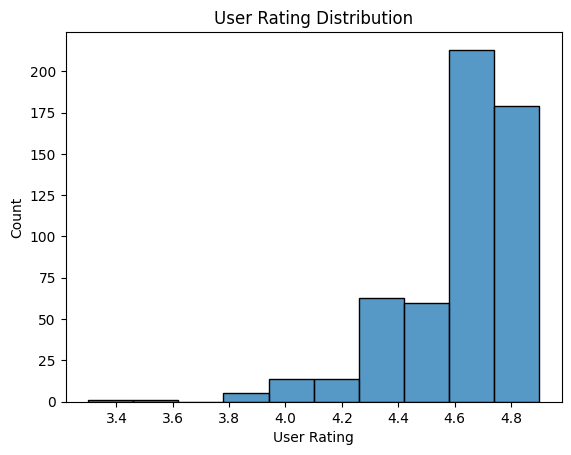

In [37]:
sns.histplot(df['User Rating'], bins=10)
plt.title('User Rating Distribution')
plt.show()

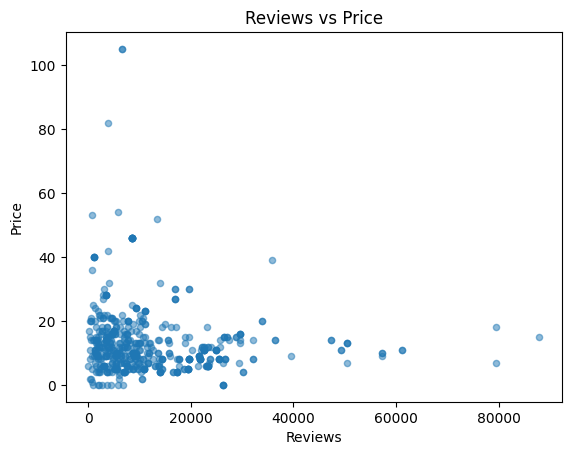

In [38]:
df.plot.scatter(x='Reviews', y = 'Price', alpha = 0.5)
plt.title('Reviews vs Price')
plt.show()

In [40]:
df['Genre'] =df['Genre'].map({'Non Fiction': 0, 'Fiction': 1})

# Prediction Model

In [45]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,0


In [71]:
features = ['User Rating', 'Reviews', 'Price', 'Year']
X = df[features]
y = df['Genre']

o_train_X, o_test_X, o_train_y, o_test_y = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [72]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(o_train_X, o_train_y)
lr_pred = lr_model.predict(o_test_X)
print('Logistic Regression Accuracy:', accuracy_score(o_test_y, lr_pred))
print(classification_report(o_test_y, lr_pred))

Logistic Regression Accuracy: 0.6909090909090909
              precision    recall  f1-score   support

           0       0.66      0.86      0.75        58
           1       0.76      0.50      0.60        52

    accuracy                           0.69       110
   macro avg       0.71      0.68      0.68       110
weighted avg       0.71      0.69      0.68       110



In [73]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(o_train_X, o_train_y)
dt_pred = dt_model.predict(o_test_X)
print('Decision Tree Accuracy:', accuracy_score(o_test_y, dt_pred))
print(classification_report(o_test_y, dt_pred))


Decision Tree Accuracy: 0.8090909090909091
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        58
           1       0.86      0.71      0.78        52

    accuracy                           0.81       110
   macro avg       0.82      0.80      0.81       110
weighted avg       0.82      0.81      0.81       110



In [74]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(o_train_X, o_train_y)
rf_pred = rf_model.predict(o_test_X)
print('Random Forest Accuracy:', accuracy_score(o_test_y, rf_pred))
print(classification_report(o_test_y, rf_pred))


Random Forest Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        58
           1       0.88      0.67      0.76        52

    accuracy                           0.80       110
   macro avg       0.82      0.79      0.79       110
weighted avg       0.81      0.80      0.80       110



In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
o_train_X_norm = scaler.fit_transform(o_train_X)
o_test_X_norm = scaler.transform(o_test_X)
dnn = Sequential([Dense(16, input_shape = (o_train_X_norm.shape[1], ), activation = 'relu'),
                  Dense(8, activation = 'relu'),
                  Dense(1, activation = 'sigmoid')])

dnn.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = dnn.fit(o_train_X_norm, o_train_y, validation_data= (o_test_X_norm, o_test_y), epochs = 50, batch_size = 16, verbose =1)
dnn_loss, dnn_accuracy = dnn.evaluate(o_test_X_norm, o_test_y, verbose=0)
print('DNN Accuracy:', dnn_accuracy)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4191 - loss: 0.7339 - val_accuracy: 0.5182 - val_loss: 0.6991
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4857 - loss: 0.7016 - val_accuracy: 0.6545 - val_loss: 0.6717
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4921 - loss: 0.6873 - val_accuracy: 0.7273 - val_loss: 0.6596
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6055 - loss: 0.6761 - val_accuracy: 0.7000 - val_loss: 0.6505
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6447 - loss: 0.6581 - val_accuracy: 0.7091 - val_loss: 0.6407
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6747 - loss: 0.6424 - val_accuracy: 0.7182 - val_loss: 0.6298
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6566 - loss: 0.6268 - val_accuracy: 0.6455 - val_loss: 0.6196
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6549 - loss: 0.6279 - val_accuracy: 0.6455 - val_loss: 0.6113
Ep

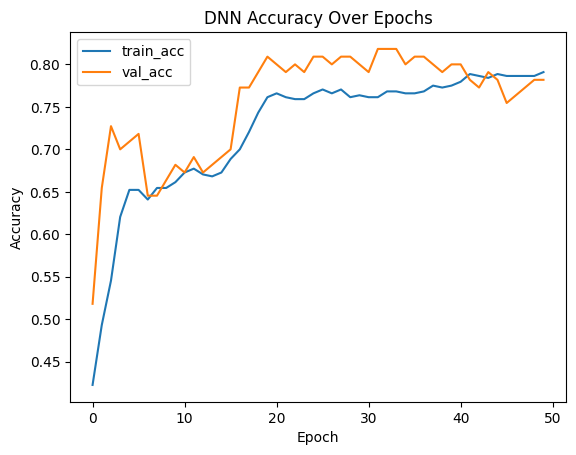

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


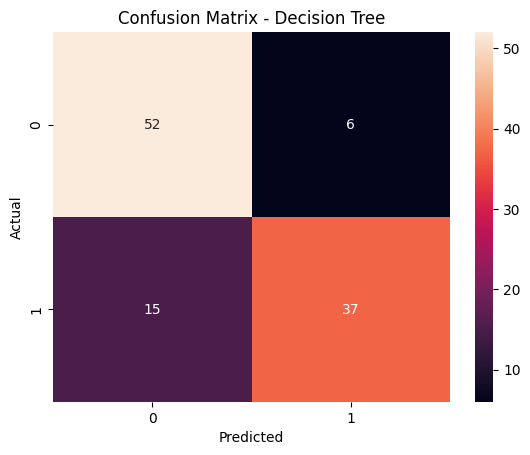

In [77]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('DNN Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


models = {'Logistic Regression': (lr_pred,),
          'Decision Tree': (dt_pred,),
          'Random Forest': (rf_pred,),
          'DNN': (dnn.predict(o_test_X_norm).round().astype(int),)}

best_model = max(models, key = lambda name: accuracy_score(o_test_y, models[name][0]))

best_pred = models[best_model][0]
cm = confusion_matrix(o_test_y, best_pred)
sns.heatmap(cm, annot=True , fmt = 'd')
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

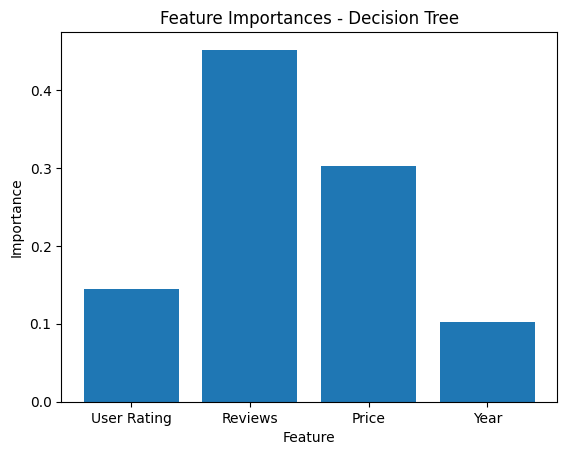

In [79]:
if best_model in ['Decision Tree', 'Random Forest']:

    model_map = {
        'Decision Tree': dt_model,
        'Random Forest': rf_model
    }
    importances = model_map[best_model].feature_importances_

    plt.bar(features, importances)
    plt.title(f'Feature Importances - {best_model}')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()
else:
    print(f"Feature importance is not directly available for {best_name} (DNN).")